# Autoencoders

Auto encoders encode and decode data using an atrificual neural network. The encoding and decoding is data specific and lossy. Therefore it has clear applications and drawbacks.

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Building the entire model.

encoding_dim = 15
#The lower the encoding dimension the more the compression 
input_img = Input(shape=(784,))
# encoded representation of input with 784 features, used to tell the NN what input to expect on initialization.
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code using a dense hidden layer that expects the inout specified before.
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images, here expecting an encoded input with encoded dimension.
autoencoder = Model(input_img, decoded)
#model groups layers into a single object, start with the input and end with the output.
#Do note however that this model builds the hidden layers too as long as they are connected to the previous layer.

#compilis the model.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


The autoencoder will now train on that specific data and modify the encoded and decoded layers to produce the results. Too look inside the model then; it is necessary to pull those layers out of the model. The encoded layer can be pulled without modification. The decoded layer however requires a new input though and will need to be modified.

In [ ]:
#for interest we can build the encoder and decoder seperately for investigation.

# This model shows encoded images, it accepts the original image and outputs the encoded image
encoder = Model(input_img, encoded)
# The new decoded input, since it will not be connected to the previous layer anymore.
encoded_input = Input(shape=(encoding_dim,))
#pull the decoded layer from the model and specify its new input.
decoder_layer  = autoencoder.layers[-1](encoded_input)
# decoder model
decoder = Model(encoded_input, decoder_layer)

In [ ]:
#loading the data and normalizing it.

(x_train, y_train), (x_test, y_test) = mnist.load_data() #returns 60 000 intances of 28x28 arrays

#normalization, could use standard scaler but the scale here is clear.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#example of the original image
fig, ax = plt.subplots()
ax.imshow(x_train[0])
ax.set(title = f'The digit {y_train[0]}', xticks=[],yticks=[])
plt.show()

#our model accepts inputs of shape (784,) so we reshape the data to allow them to be viable inputs
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
#training the model
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))
#Note the input and output has to be the same. since we are encoding and decoding the images with this model.

The model is now trained and means the layers have been modified. If we new call our previous models thats been created it will pull those layers out of the model and we can look into the guts of our NN

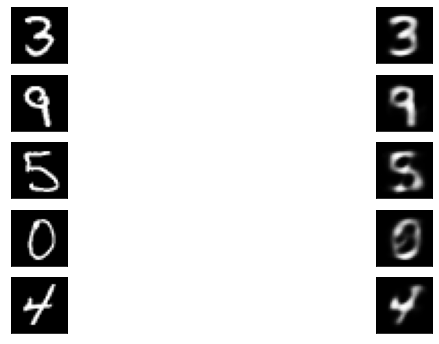

In [24]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
fig, ax = plt.subplots(5,2,figsize=(12,6))
for ind, value in enumerate(np.random.randint(1,10001,5)):
    ax[ind,0].imshow(x_test[value].reshape(28,28))
    ax[ind,1].imshow(decoded_img[value].reshape(28,28))
    ax[ind,0].set(xticks = [], yticks = [])
    ax[ind,1].set(xticks = [], yticks = [])

#Here the lossy nature is deplayed. But recall that the amount of features were reduced to 15 from 784.